In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

desired_width = 400
pd.set_option('display.width', desired_width)        # sets run screen width to 400
pd.set_option('display.max_columns', 20)             # sets run screen column display to 20
df = pd.read_csv(r'movies.csv')   # reads Zillow file
df.info()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)

df2 = df[['vote_average', 'vote_count', 'revenue', 'runtime','gender']]   # reduced df
df2.fillna(0, inplace=True)       
print(df2.head(2))                                        # prints top two rows of df3

k_groups = KMeans(n_clusters=5, random_state=0).fit(df2)  # separates data set into 5 distinguishable groups
print(k_groups.labels_)                                   # displays k_groups' label (0 to 4) for each row
print(len(k_groups.labels_),df2.shape)                    # displays rows in k_groups as well as rows, columns in df3
print(k_groups.cluster_centers_)         # displays averages of the seven columns for each cluster centroid [0, 1, 2, 3, 4]
print(k_groups.cluster_centers_[0])       # displays averages for each of the seven columns in the cluster centroid [0]

df2['cluster'] = k_groups.labels_                         # add a new column to df3 called 'cluster', the k-group #
print(df2.groupby('cluster').min())                      # display the means of the seven columns of data frame df3

from sklearn.metrics import silhouette_score              # coefficient score where higher is better, 0 = cluster overlap
df3 = df2.drop('cluster', axis = 1)                       # create a new data frame df4 that dropped the cluster column
# for loop to determine optimum K groups
for i in range(3, 10):                                    # for loop to determine best number of K clusters between 3 and 10
    k_groups = KMeans(n_clusters = i).fit(df3)            # K clusters must have atleast 2 clusters
    labels = k_groups.labels_
    print('K Groups = ', i, 'Silhouette Coeffient = ', silhouette_score(df3, labels))  # displays i and coefficient
# End of Data Mining - Cluster Analysis

In [ ]:
# Data Mining - classification & regression - Logistic Regression
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

desired_width = 400
pd.set_option('display.width', desired_width)        # sets run screen width to 400
pd.set_option('display.max_columns', 20)             # sets run screen column display to 20
df = pd.read_csv(r'movies.csv')   # reads Zillow file
df.info()

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)

# replaces the NaN with 0 to have even 15,000 in all 7 variables
X = df[['vote_average', 'vote_count', 'revenue', 'runtime']] # reduced df as upper case X matrix
y = df.gender 
# predictor variable lower case y as array

df['gender'] = df.gender.apply(lambda x: 'male' if x < 1 else 'female')
y2 = df.gender

log = LogisticRegression()                                         # assigning alias lg to LogisticRegression() function
print(log.fit(X,y2))                                               # training the logistic regression model
print(log.score(X,y2))                                             # test the logistic regression model

X_train, X_test, y2_train, y2_test = train_test_split(X,y2)        # randomly split X,y data to 2 X,y (train,test) sets
print(X_train.shape, y2_train.shape, X_test.shape, y2_test.shape)  # we used default settings 80% is train to 20% test
print(log.fit(X_train, y2_train))                                    # Using 11,250 data points to train model
print(log.score(X_test, y2_test))                                    # Using  3,750 data points to test/evaluate R2 of model


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('movies.csv', low_memory=False)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)

X = df[['revenue', 'vote_count', 'runtime','gender']] # reduced df as upper case X matrix
y = df.vote_average                                           # predictor variable lower case y as array
lg = LinearRegression()                                          # assigning alias lg to LinearRegression() function
print(lg.fit(X,y))                                               # training the regression model
print(lg.score(X,y))                                             # test the regression model
X_train, X_test, y_train, y_test = train_test_split(X,y)         # randomly split X,y data to 2 X,y (train,test) sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)  # we used default settings 80% is train to 20% test
print(lg.fit(X_train, y_train))                                  # Using 11,250 data points to train model
print(lg.score(X_test, y_test))                                  # Using  3,750 data points to test/evaluate R2 of model


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

desired_width = 400
pd.set_option('display.width', desired_width)        # sets run screen width to 400
pd.set_option('display.max_columns', 20)             # sets run screen column display to 20
df = pd.read_csv(r'movies.csv')   # reads Zillow file

# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Create new column 'gender' with random values 0 or 1
df['gender'] = np.random.randint(0, 2, size=len(df))

# Save the processed data to a new CSV file
df.to_csv('df2.csv', index=False)

df = pd.read_csv('df2.csv', low_memory=False)
df2 = df[['vote_average', 'vote_count', 'revenue', 'runtime','gender']]   # reduced df
df2.fillna(0, inplace=True)       
X = df[['vote_average', 'vote_count', 'gender', 'runtime']] # reduced df as upper case X matrix
X1 = X                                               # duplicate of X
y = df.revenue
df['revenue'] = df.revenue.apply(lambda x: 'low' if x < 500000 else 'high')
y2 = df.revenue                                      
X_train, X_test, y_train, y_test = train_test_split(X,y)       
X1_train, X1_test, y2_train, y2_test = train_test_split(X1,y2)        
svr_reg = SVR()                                          # assign svr_reg to the SVR function
svc_class = SVC()                                        # assign svc_class to the SVC function
svr_reg.fit(X_train, y_train)                            # fit a SVR() model using 11,250 data points
print('svr_score = ', svr_reg.score(X_test, y_test))
svc_class.fit(X1_train, y2_train)                        # fit a SVC() model using 11,250 data points
print('svc_score = ', svc_class.score(X1_test, y2_test)) # 
y2_pred = svc_class.predict(X_test)                      # assigns y2_pred to SVC prediction of X_test data
print(confusion_matrix(y2_test, y2_pred))                #

                    id  vote_average  vote_count   revenue   runtime    gender
id            1.000000     -0.264918   -0.231100 -0.037813 -0.192567 -0.003031
vote_average -0.264918      1.000000    0.246775  0.067455  0.222048 -0.009463
vote_count   -0.231100      0.246775    1.000000  0.675393  0.301612  0.005566
revenue      -0.037813      0.067455    0.675393  1.000000  0.155653  0.014385
runtime      -0.192567      0.222048    0.301612  0.155653  1.000000  0.007800
gender       -0.003031     -0.009463    0.005566  0.014385  0.007800  1.000000


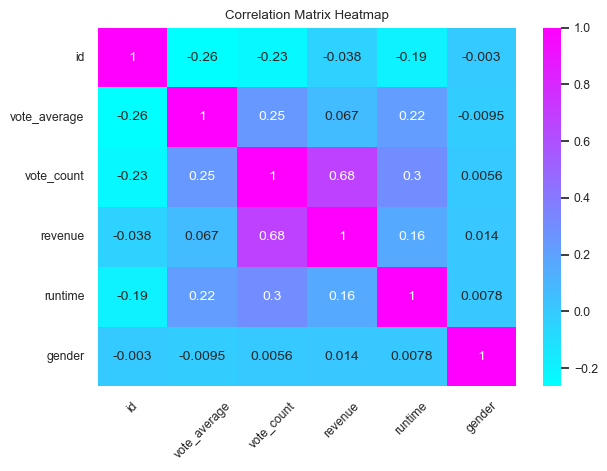

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

desired_width = 400
pd.set_option('display.width', desired_width)        # sets run screen width to 400
pd.set_option('display.max_columns', 20)             # sets run screen column display to 20
df = pd.read_csv(r'movies.csv')   # reads Zillow file

df = pd.read_csv('df2.csv', low_memory=False)
corr_matrix1 = df.corr()
print(corr_matrix1)
sn.set(font_scale=0.8)
sn.heatmap(corr_matrix1, cmap="cool", annot=True, annot_kws={"size": 10})
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# # Drop duplicates
# df.drop_duplicates(inplace=True)

# # Fill numerical columns with mean
# df.fillna(df.mean(), inplace=True)

# # Create new column 'gender' with random values 0 or 1
# df['gender'] = np.random.randint(0, 2, size=len(df))

# # Save the processed data to a new CSV file
# df.to_csv('df2.csv', index=False)


# # Save the plot to disk
# plt.savefig("correlation_heatmap2.png")

# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# #AND
# # Replace missing values with column mean
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
# #verifying if there is no null values in any columns
# print(df.isnull().sum())


# df2 = df[numeric_cols]
# print(df2.info())

# corr_matrix = df2.corr()
# print(corr_matrix)

# # Create a heatmap using Seaborn
# sn.set(font_scale=0.8)
# sn.heatmap(corr_matrix, cmap="cool", annot=True, annot_kws={"size": 10})
# plt.title("Correlation Matrix Heatmap")
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.tight_layout()

# # Save the plot to disk
# plt.savefig("correlation_heatmap.png")